# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

In [1]:
%pip install -r ../requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 22.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 13.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 95.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 95.4 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 94.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing2/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing2'

# Load collected data

In [4]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
# import all necessary packages and libraries for the notebook
import os
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
sns.set(style="whitegrid")


## Investigate cleaned data file

* First we load the cleaned data file to have a quick overview of the input data.

In [35]:
import pandas as pd

# Corrected file path
df_raw_path = "/workspace/heritage-housing2/jupyter_notebooks/outputs/datasets/cleaned/HousePricesCleaned.csv" 

# Read the CSV file
df = pd.read_csv(df_raw_path)

# Display the first 5 rows
df.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.000000,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.000000,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.000000,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,2.869214,No,216,ALQ,540,642,Unf,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.000000,Av,655,GLQ,490,836,RFn,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000


In [36]:
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
pip install pandas seaborn scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


## Initial heatmap
* We create a heatmap to check the correlations before continue with further analysis.

All columns with their data types:
 1stFlrSF          int64
2ndFlrSF        float64
BedroomAbvGr    float64
BsmtExposure     object
BsmtFinSF1        int64
BsmtFinType1     object
BsmtUnfSF         int64
GarageArea        int64
GarageFinish     object
GarageYrBlt     float64
GrLivArea         int64
KitchenQual      object
LotArea           int64
LotFrontage     float64
MasVnrArea      float64
OpenPorchSF       int64
OverallCond       int64
OverallQual       int64
TotalBsmtSF       int64
YearBuilt         int64
YearRemodAdd      int64
SalePrice         int64
dtype: object

Converted float columns:
    2ndFlrSF  BedroomAbvGr  GarageYrBlt  LotFrontage  MasVnrArea
0       854             3         2003           65         196
1         0             3         1976           80           0
2       866             3         2001           68         162
3         0             3         1998           60           0
4         0             4         2000           84         350


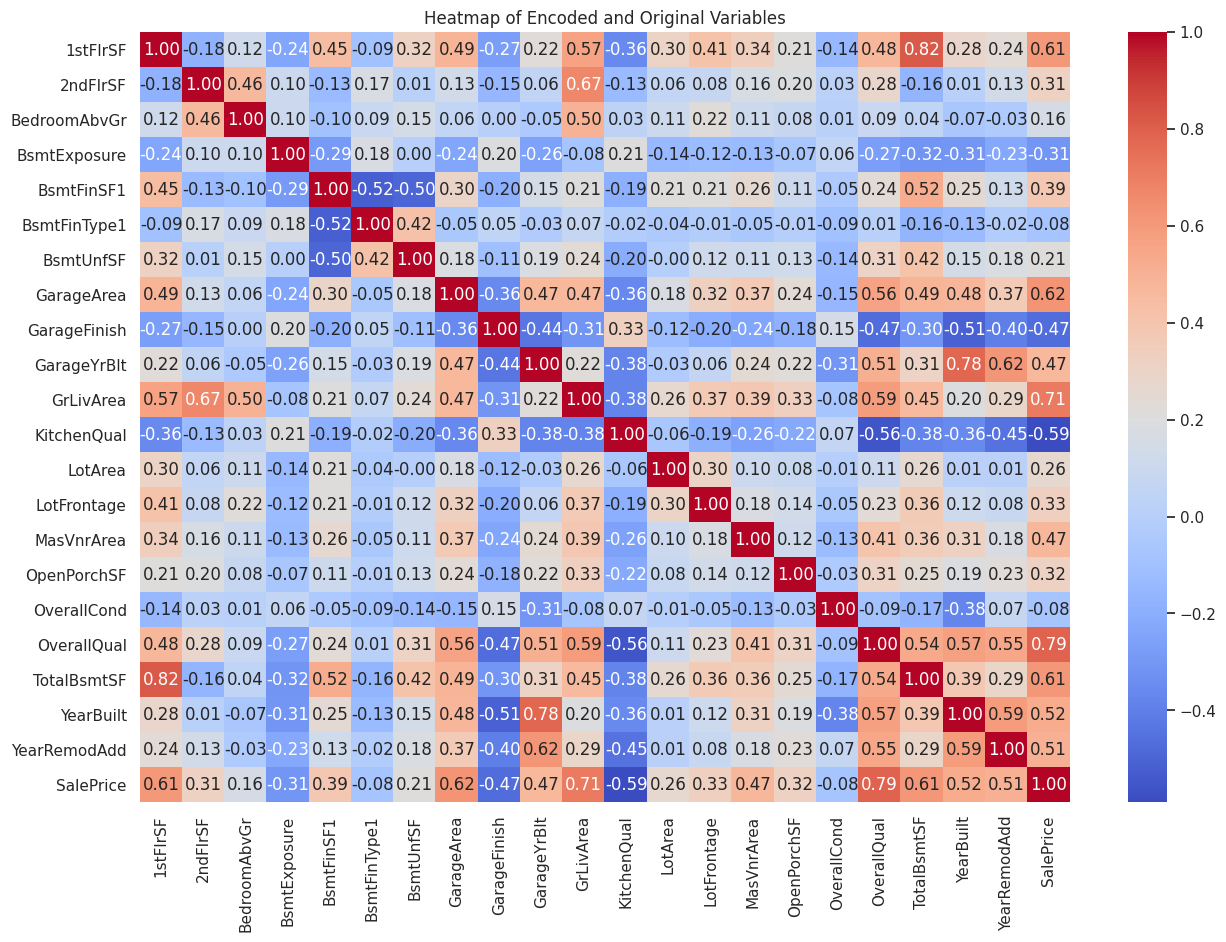

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "/workspace/heritage-housing2/jupyter_notebooks/outputs/datasets/cleaned/HousePricesCleaned.csv"
df = pd.read_csv(file_path)

# Display column names and their data types
print("All columns with their data types:\n", df.dtypes)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Convert float variables to integers
float_columns = df.select_dtypes(include=['float64']).columns.tolist()
for column in float_columns:
    df[column] = df[column].round().astype(int)

# Print converted float values for verification
print("\nConverted float columns:\n", df[float_columns].head())

# Prepare the data for heatmap
encoded_df = df.copy()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Encoded and Original Variables')
plt.show()

### Initial conclusion: most significant variables to sale price

* The most significant variables accordiong to first on the cleaned data file are.
    * 0.79 OverallQuall
    * 0.71 GrLivArea
    * 0.62 GarageArea
    * 0.61 1stFlrSF
    * 0.61 TotalBsmtSF

## Pearson and Spearman correlation values

In [38]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_pearson

OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
KitchenQual    -0.589189
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
GarageYrBlt     0.466754
GarageFinish   -0.465039
BsmtFinSF1      0.386420
LotFrontage     0.334771
OpenPorchSF     0.315856
2ndFlrSF        0.312479
BsmtExposure   -0.309043
LotArea         0.263843
BsmtUnfSF       0.214479
BedroomAbvGr    0.155784
OverallCond    -0.077856
BsmtFinType1   -0.077786
Name: SalePrice, dtype: float64

In [39]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_spearman

OverallQual     0.809829
GrLivArea       0.731310
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
1stFlrSF        0.575408
YearRemodAdd    0.571159
KitchenQual    -0.569857
GarageYrBlt     0.563256
GarageFinish   -0.533341
OpenPorchSF     0.477561
LotArea         0.456461
MasVnrArea      0.415906
LotFrontage     0.375590
BsmtExposure   -0.320961
BsmtFinSF1      0.301871
2ndFlrSF        0.279845
BedroomAbvGr    0.223576
BsmtUnfSF       0.185197
OverallCond    -0.129325
BsmtFinType1   -0.086410
Name: SalePrice, dtype: float64

## Create detailed heatmaps

### Prepare correlation and display of variables

In [40]:
def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)


### Display list with PPS score

In [41]:
import pandas as pd
import ppscore as pps

# Load the DataFrame with your data
df = pd.read_csv("/workspace/heritage-housing2/jupyter_notebooks/outputs/datasets/cleaned/HousePricesCleaned.csv")

# Calculate the PPS matrix
pps_matrix = pps.matrix(df)

# Filter the PPS matrix to show only the rows where 'y' is 'SalePrice'
pps_against_saleprice = pps_matrix[pps_matrix['y'] == 'SalePrice']

# Sort by the PPS score in descending order
pps_against_saleprice_sorted = pps_against_saleprice.sort_values(by='ppscore', ascending=False)

# Display the sorted PPS matrix
print(pps_against_saleprice_sorted)

                x          y   ppscore            case  is_valid_score  \
483     SalePrice  SalePrice  1.000000  predict_itself            True   
395   OverallQual  SalePrice  0.440962      regression            True   
263   KitchenQual  SalePrice  0.261966      regression            True   
439     YearBuilt  SalePrice  0.198485      regression            True   
175    GarageArea  SalePrice  0.187993      regression            True   
219   GarageYrBlt  SalePrice  0.158649      regression            True   
461  YearRemodAdd  SalePrice  0.143284      regression            True   
197  GarageFinish  SalePrice  0.112165      regression            True   
241     GrLivArea  SalePrice  0.100166      regression            True   
131  BsmtFinType1  SalePrice  0.071768      regression            True   
307   LotFrontage  SalePrice  0.066151      regression            True   
417   TotalBsmtSF  SalePrice  0.052363      regression            True   
373   OverallCond  SalePrice  0.047155

### Display general PPS score information

In [42]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  462.0  0.061  0.105  0.0  0.0  0.0  0.082  0.625


### Display heatmap



* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



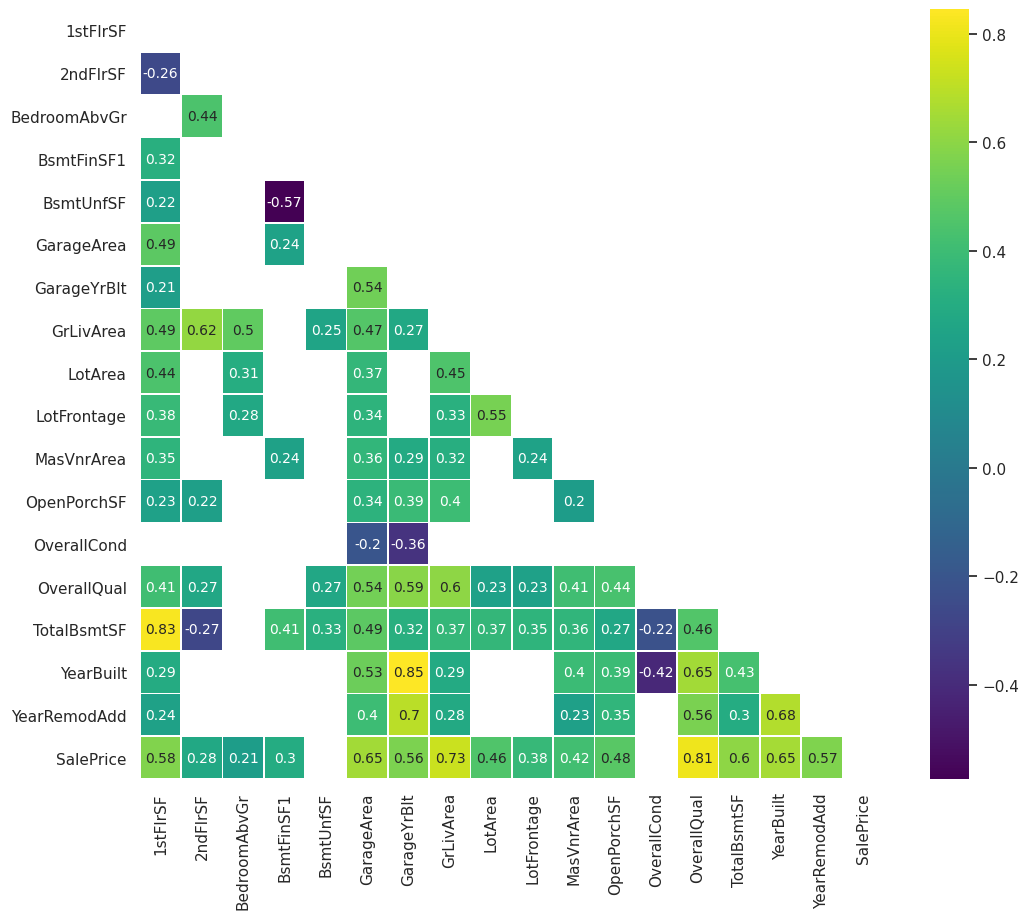



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



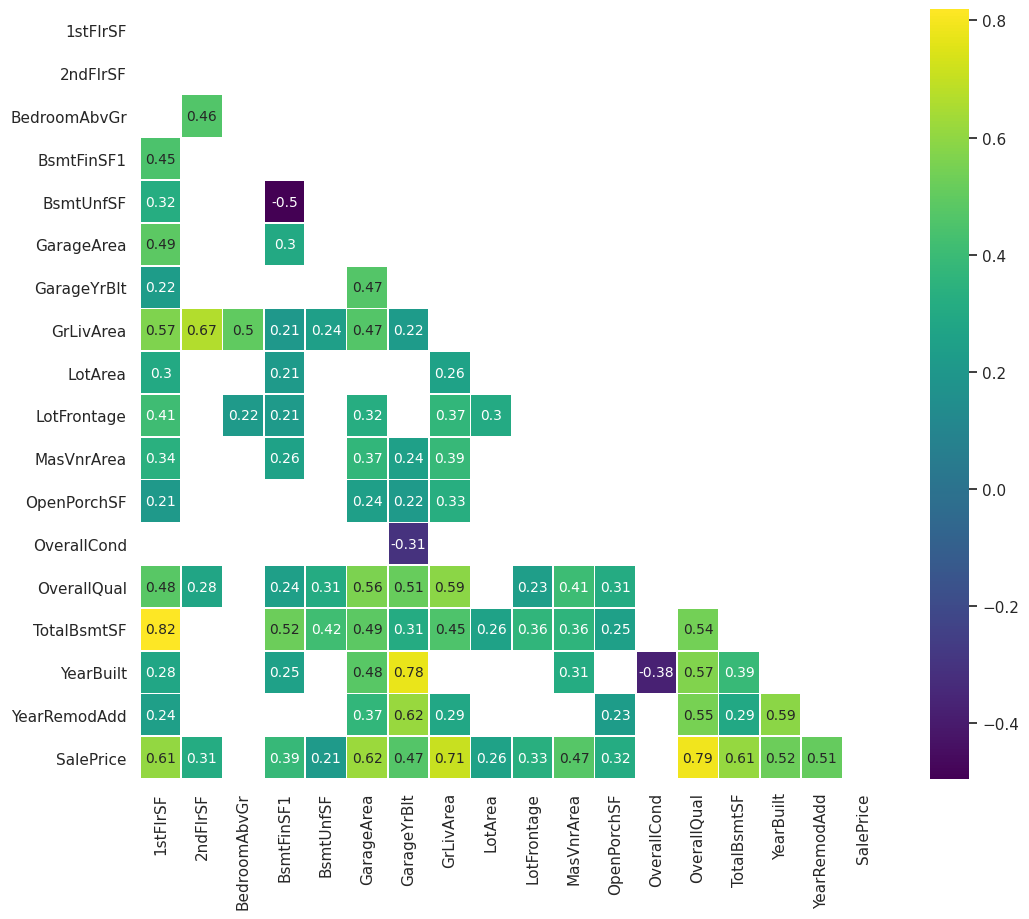



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



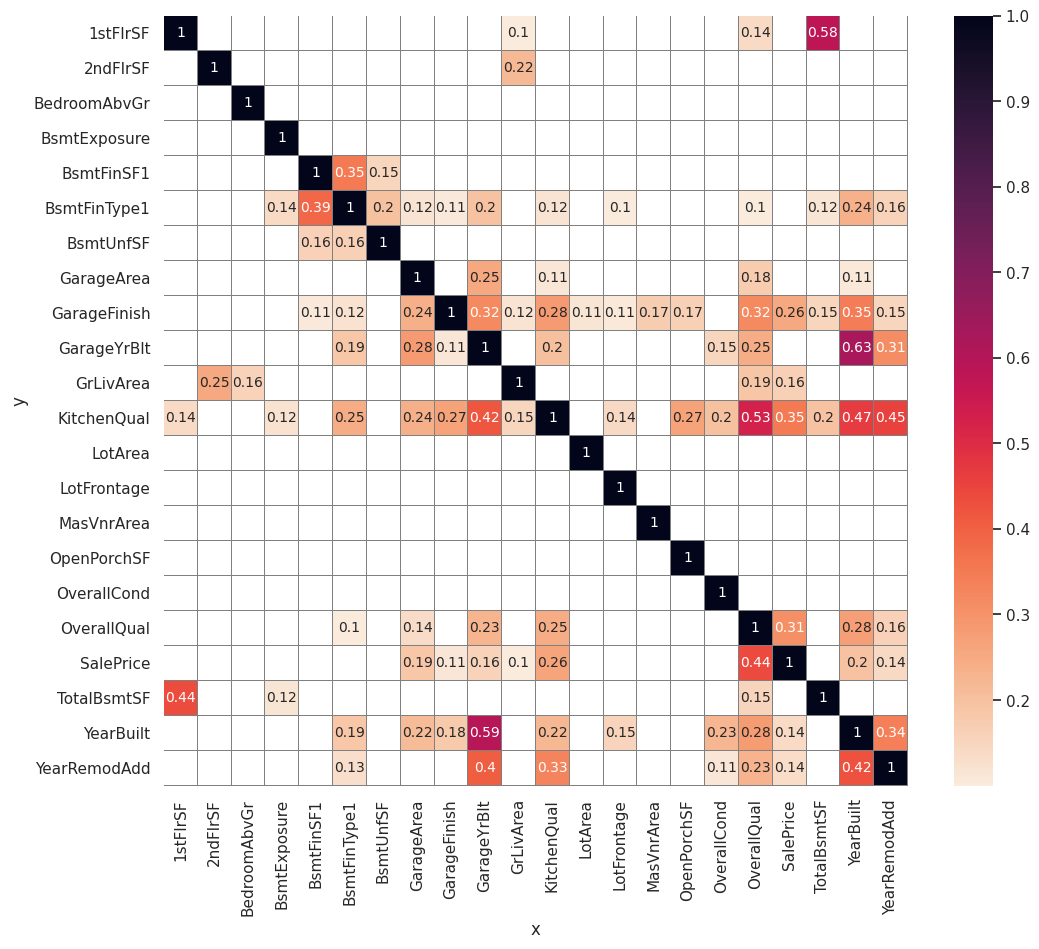

In [43]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman,
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.2, PPS_Threshold = 0.1,
                  figsize=(12,10), font_annot = 10)

## Investigation of predictive score


### PPS
* We notice that 1stFlrSF is dominating while there are five other relevant variables to consider.
* We will perform a deeper analysis for the following data:
    * OverallQual     0.440962
    * KitchenQual     0.261966
    * YearBuilt       0.198485
    * GarageArea      0.187993
    * GarageYrBuilt   0.158649
    * YearRemodAdd    0.143284



### Pearson correlation
* OverallQual       (0.790982)
* GrLivArea         (0.708624)
* GarageArea        (0.623431)
* TotalBsmtSF       (0.613581)
* 1stFlrSF          (0.605852)
* KitchenQual       (-0.589189)

### Spearman correlation
* OverallQual     0.809829
* GrLivArea       0.731310
* YearBuilt       0.652682
* GarageArea      0.649379
* TotalBsmtSF     0.602725
* 1stFlrSF        0.575408


<div style="display: flex;">
    <div style="margin-right: 20px;">
        <h2>PPS</h2>
        <table>
            <tr><th>Variable</th><th>Score</th></tr>
            <tr><td>OverallQual</td><td>0.441</td></tr>
            <tr><td>KitchenQual</td><td>0.262</td></tr>
            <tr><td>YearBuilt</td><td>0.198</td></tr>
            <tr><td>GarageArea</td><td>0.188</td></tr>
            <tr><td>GarageYrBuilt</td><td>0.159</td></tr>
            <tr><td>YearRemodAdd</td><td>0.143</td></tr>
        </table>
    </div>
    <div style="margin-right: 20px;">
        <h2>Pearson Correlation</h2>
        <table>
            <tr><th>Variable</th><th>Correlation</th></tr>
            <tr><td>OverallQual</td><td>0.791</td></tr>
            <tr><td>GrLivArea</td><td>0.709</td></tr>
            <tr><td>GarageArea</td><td>0.623</td></tr>
            <tr><td>TotalBsmtSF</td><td>0.614</td></tr>
            <tr><td>1stFlrSF</td><td>0.606</td></tr>
            <tr><td>KitchenQual</td><td>-0.589</td></tr>
        </table>
    </div>
    <div>
        <h2>Spearman Correlation</h2>
        <table>
            <tr><th>Variable</th><th>Correlation</th></tr>
            <tr><td>OverallQual</td><td>0.810</td></tr>
            <tr><td>GrLivArea</td><td>0.731</td></tr>
            <tr><td>YearBuilt</td><td>0.653</td></tr>
            <tr><td>GarageArea</td><td>0.649</td></tr>
            <tr><td>TotalBsmtSF</td><td>0.603</td></tr>
            <tr><td>1stFlrSF</td><td>0.575</td></tr>
        </table>
    </div>
</div>

### Conclusion of first check for correlation
* We want to check if we can use one value in the same category (e.g area or quaility variables) to represent two or more similar to create an effecient variable to use
  in pipeline if possible. 
    * Category - Quality: We have two quality variables Overall Quality and Kitchen Quality we want to see if we have a strong between these ones, we have the following correlation;
      * 







* 1stFlrSF - mediate pps but a bit lower on correlation quite close between Pn and Sp.
* OverallQual -  lower pps but high correlation with sale price.
* BsmtExposure - low pps, and bsmt exposure is not even in the first 6 for pearson and spearman.
* YearBuilt - low pps and do not exist in pearson but medium in spearman.
* KitchenQual - low pps and negative for pearson, does not exist for spearman.
* BsmtFinSF1 - lowest pps does not exists for pearson nor spearman.


* BsmtExposure - Only PPS
* YearBuilt - PPS and Spearman
* KitchenQual - PPS and Pearson
* BsmtFinSF1 - Only PPS

* GrLivArea - Pearson and Spearman
* GarageArea - Pearson and Spearman
* TotalBsmtSF - Pearson and Spearman


* The most significant variables considering both Pearson and Spearman is: OverallQual, GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF, YearBuilt (for Pearson correlation the last was KitchenQual but with a lower value hence the YearBuilt was identified as the 6th value).


## Compare pearson and spearman
* In this section we will check if there is any significant differences between pearson and spearman for the most significant variables.

In [44]:
import pandas as pd

# The specified variables
variables = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']
target = 'SalePrice'

# Assuming df_corr_pearson and df_corr_spearman are your correlation matrices
# Extract the correlation values for the specified variables
pearson_values = df_corr_pearson.loc[variables, target]
spearman_values = df_corr_spearman.loc[variables, target]

# Create a DataFrame to compare the values
comparison_df = pd.DataFrame({
    'Variable': variables,
    'Pearson Correlation': pearson_values.values,
    'Spearman Correlation': spearman_values.values
})

# Sort the DataFrame by 'Pearson Correlation' in descending order
sorted_comparison_df = comparison_df.sort_values(by='Pearson Correlation', ascending=False)

# Display the sorted DataFrame
print(sorted_comparison_df)

      Variable  Pearson Correlation  Spearman Correlation
0  OverallQual             0.790982              0.809829
1    GrLivArea             0.708624              0.731310
2   GarageArea             0.623431              0.649379
3  TotalBsmtSF             0.613581              0.602725
4     1stFlrSF             0.605852              0.575408
5    YearBuilt             0.522897              0.652682


## Grade variables according to significance
* For the data we are interested to know if the importance of each variable, meaning that values close to either either -1 or 1 are most significant. Sorted by Pearson , furhter analysis on discrepancy between Pearson and Spearman will be done in upcoming sections.
1. OverallQual  (Pn.  0.79)
2. 1stFlrSF     (Pn.  0.61)
3. KitchenQual  (Pn. -0.59)
4. YearBuilt    (Pn.  0.52)
5. BsmtFinSF1   (Pn.  0.39)
6. BsmtExposure (Pn. -0.31)

## Summary comparison Pearson, Spearman and Power Predictive Score
* If we compare the power predictive score most with the equivavelt for pearson correlation we see the following differences:
    * 1stFlrSF PPS (1)  - PC (2) : PPS is calculated at a higher rank than PC.
    * OverallQual (2)   - PC (1) : PPS is calculated at a lower rank than PC.
    * BsmtExposure (3)  - PC (6) : PPS is calculated at a higher rank than PC.
    * YearBuilt (4)     - PC (4) : PPS is calculated at the same rank.
    * KitchenQual (5)   - PC (3) : PPS is calculated at a lower rank than PC.
    * BsmtFinSF1  (6)   - PC (5) : PPS is calculated at a lower rank than PC.

* We noticed that for the pearson and spearman correlation factor, the clearest difference in were the following order: 
    * YearBuilt     (0.13)
    * BsmtFinSF1    (0.09)
    * 1stFlrSF      (0.03)
    * KitchenQual   (0.02)
    * OverallQual   (0.02)
    * BsmtExposure  (0.01)  
    

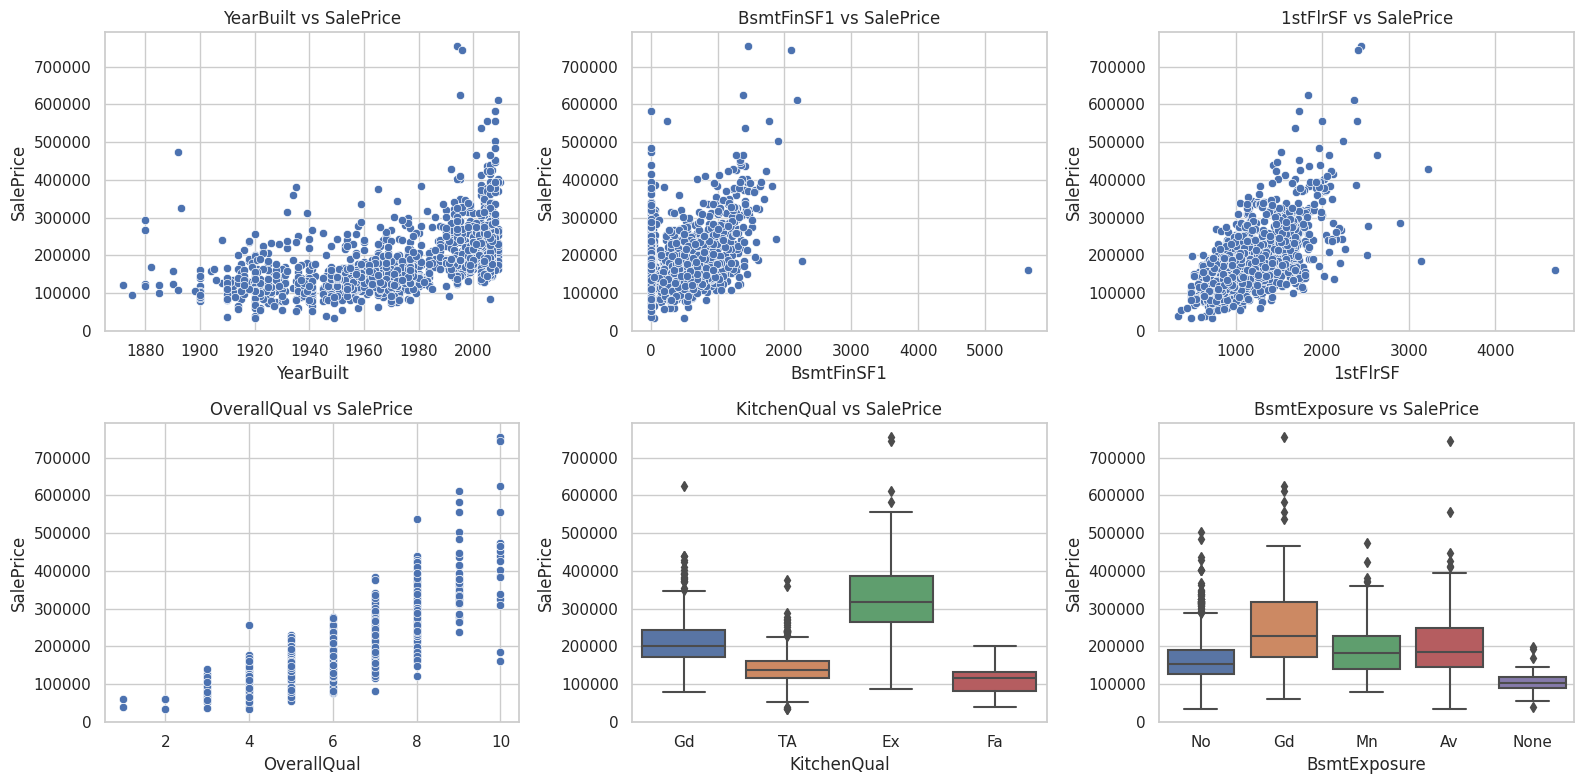

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define your data frame containing these variables and sales price
# Assuming `df` is your DataFrame containing the data

# Continuous variables
continuous_vars = ['YearBuilt', 'BsmtFinSF1', '1stFlrSF', 'OverallQual']

# Categorical variables
categorical_vars = ['KitchenQual', 'BsmtExposure']

# Plot continuous variables against sales price
plt.figure(figsize=(16, 8))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=var, y='SalePrice', data=df)
    plt.title(f'{var} vs SalePrice')

# Plot categorical variables against sales price
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, len(continuous_vars) + i)
    sns.boxplot(x=var, y='SalePrice', data=df)
    plt.title(f'{var} vs SalePrice')

plt.tight_layout()
plt.show()

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_categorical_vs_sale_price(df, categorical_vars):
    """ Box plots of categorical variables vs SalePrice with mean curve overlay """
    target_var = 'SalePrice'
    
    for col in categorical_vars:
        # Create box plot
        sns.boxplot(x=df[col], y=df[target_var])
        
        # Calculate mean SalePrice for each category
        means = df.groupby(col)[target_var].mean()
        
        # Overlay mean SalePrice curve
        plt.plot(means.index, means.values, color='red', marker='o', linestyle='--', linewidth=2, markersize=8)
        
        # Add titles and labels
        plt.title(f"{col} vs {target_var}", fontsize=20, y=1.05)
        plt.xlabel(col, fontsize=15)
        plt.ylabel(target_var, fontsize=15)
        
        plt.xticks(rotation=45)
        
        plt.show()
        print("\n\n")


In [47]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_spearman

OverallQual     0.809829
GrLivArea       0.731310
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
1stFlrSF        0.575408
YearRemodAdd    0.571159
GarageYrBlt     0.563256
OpenPorchSF     0.477561
LotArea         0.456461
MasVnrArea      0.415906
LotFrontage     0.375590
BsmtFinSF1      0.301871
2ndFlrSF        0.279845
BedroomAbvGr    0.210835
BsmtUnfSF       0.185197
OverallCond    -0.129325
Name: SalePrice, dtype: float64

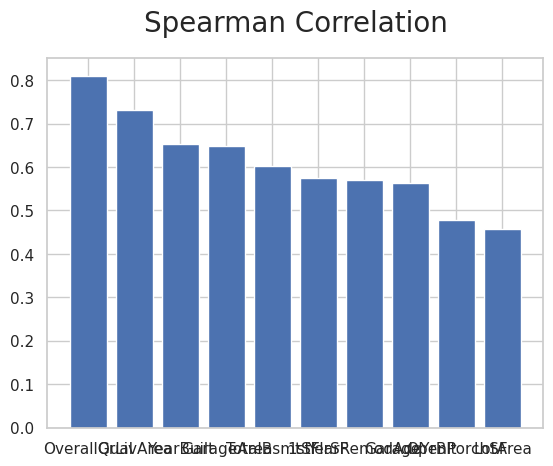

In [48]:
plt.bar(x=corr_spearman[:10].index, height=corr_spearman[:10])
plt.title("Spearman Correlation", fontsize=20, y=1.05)
plt.show()

In [49]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_pearson

OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
GarageYrBlt     0.466754
BsmtFinSF1      0.386420
LotFrontage     0.334771
OpenPorchSF     0.315856
2ndFlrSF        0.312479
LotArea         0.263843
BsmtUnfSF       0.214479
BedroomAbvGr    0.154476
OverallCond    -0.077856
Name: SalePrice, dtype: float64

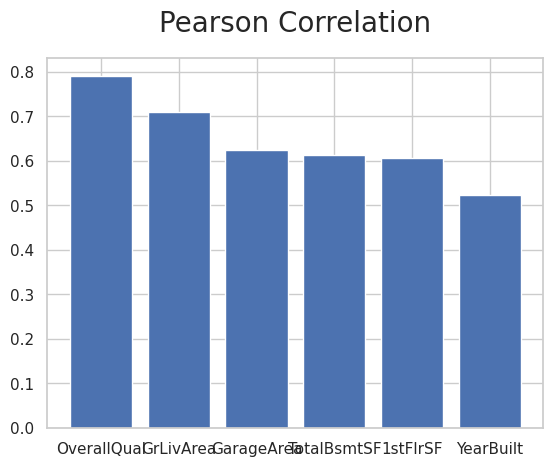

In [50]:
plt.bar(x=corr_pearson[:6].index, height=corr_pearson[:6])
plt.title("Pearson Correlation", fontsize=20, y=1.05)
plt.show()

In [51]:
top_n = 6
vars_to_study = set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())
vars_to_study

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

In [52]:
df_eda = df.filter(list(vars_to_study) + ['SalePrice'])
df_eda.head(3)

,1stFlrSF,YearBuilt,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,SalePrice
0,856,2003,7,1710,548,856,208500
1,1262,1976,6,1262,460,1262,181500
2,920,2001,7,1786,608,920,223500


Section 1 content

---

In [53]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Sample DataFrame (replace with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# Identify numeric variables
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()

# Dictionary to store correlation results
correlations = {'Variable': [], 'Pearson': [], 'Spearman': []}

# Calculate correlations
for var in numeric_vars:
    if var != 'SalePrice':  # Exclude the target variable itself
        x = df[var]
        y = df['SalePrice']
        
        pearson_coef, _ = pearsonr(x, y)
        spearman_coef, _ = spearmanr(x, y)
        
        correlations['Variable'].append(var)
        correlations['Pearson'].append(pearson_coef)
        correlations['Spearman'].append(spearman_coef)

# Create a DataFrame with the correlation results
correlation_df = pd.DataFrame(correlations)

# Calculate the absolute values of the correlations
correlation_df['Abs_Pearson'] = correlation_df['Pearson'].abs()
correlation_df['Abs_Spearman'] = correlation_df['Spearman'].abs()

# Rank the variables based on absolute correlations
correlation_df['Pearson_Rank'] = correlation_df['Abs_Pearson'].rank(ascending=False)
correlation_df['Spearman_Rank'] = correlation_df['Abs_Spearman'].rank(ascending=False)

# Combine the ranks (average of Pearson and Spearman ranks)
correlation_df['Combined_Rank'] = (correlation_df['Pearson_Rank'] + correlation_df['Spearman_Rank']) / 2

# Sort the DataFrame based on the combined rank
correlation_df.sort_values(by='Combined_Rank', inplace=True)

# Display the correlation results
print(correlation_df)

# Extract the most related variable
most_related_variable = correlation_df.iloc[0]['Variable']
print(f"The most related variable to SalePrice is: {most_related_variable}")

        Variable   Pearson  Spearman  Abs_Pearson  Abs_Spearman  Pearson_Rank  \
13   OverallQual  0.790982  0.809829     0.790982      0.809829           1.0   
7      GrLivArea  0.708624  0.731310     0.708624      0.731310           2.0   
5     GarageArea  0.623431  0.649379     0.623431      0.649379           3.0   
14   TotalBsmtSF  0.613581  0.602725     0.613581      0.602725           4.0   
15     YearBuilt  0.522897  0.652682     0.522897      0.652682           6.0   
0       1stFlrSF  0.605852  0.575408     0.605852      0.575408           5.0   
16  YearRemodAdd  0.507101  0.571159     0.507101      0.571159           7.0   
6    GarageYrBlt  0.466754  0.563256     0.466754      0.563256           9.0   
10    MasVnrArea  0.472614  0.415906     0.472614      0.415906           8.0   
11   OpenPorchSF  0.315856  0.477561     0.315856      0.477561          12.0   
3     BsmtFinSF1  0.386420  0.301871     0.386420      0.301871          10.0   
9    LotFrontage  0.334771  

## Display view of Pearson and Spearman per variable.

In [54]:
unique_kitchen_qualities = df['KitchenQual'].unique()
print("Unique values in 'KitchenQual' column:", unique_kitchen_qualities)

Unique values in 'KitchenQual' column: ['Gd' 'TA' 'Ex' 'Fa']


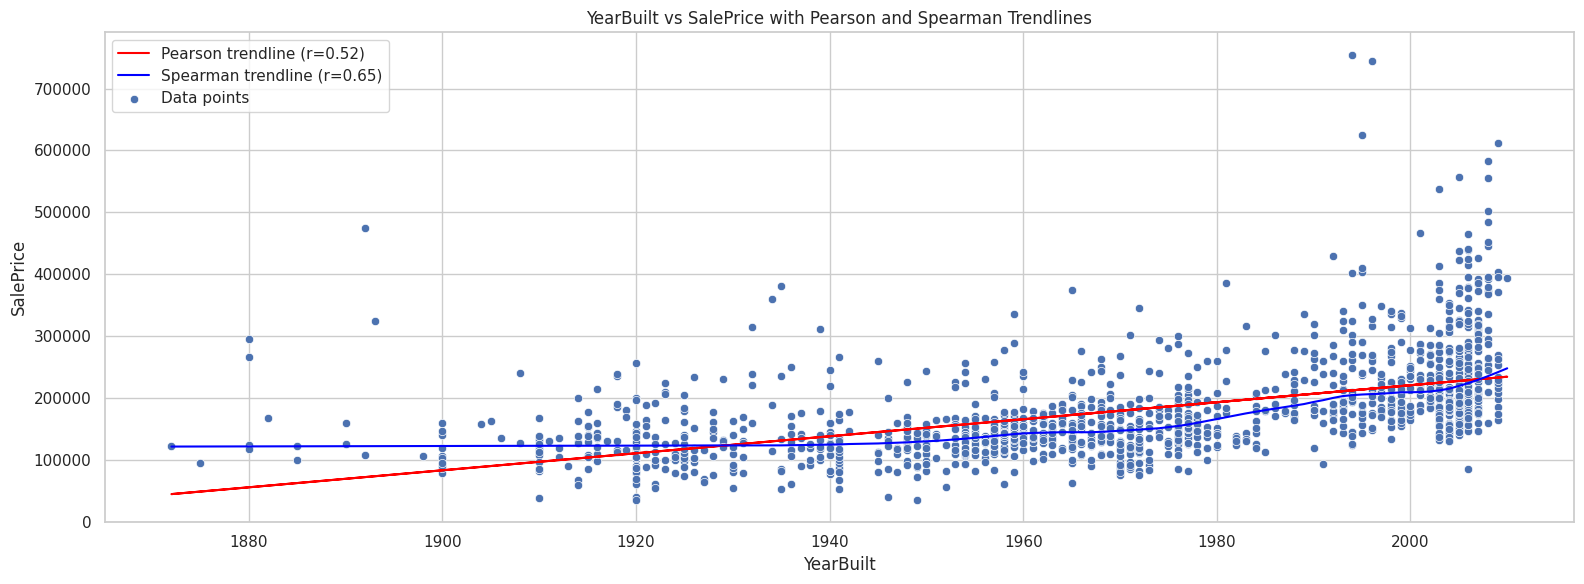

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, linregress
from statsmodels.nonparametric.smoothers_lowess import lowess

# Assuming df is your DataFrame and has been defined elsewhere

# Function to plot a variable against SalePrice with Pearson and Spearman trendlines
def plot_with_trendlines(df, vars, target='SalePrice'):
    num_vars = len(vars)
    plt.figure(figsize=(16, 6 * num_vars))
    
    for i, var in enumerate(vars, 1):
        x = df[var]
        y = df[target]
        
        # Pearson correlation
        pearson_coef, _ = pearsonr(x, y)
        slope_pearson, intercept_pearson, _, _, _ = linregress(x, y)
        line_pearson = slope_pearson * x + intercept_pearson
        
        # Spearman correlation
        spearman_coef, _ = spearmanr(x, y)
        lowess_smoothed = lowess(y, x, frac=0.3)
        
        # Plotting
        plt.subplot(num_vars, 1, i)
        sns.scatterplot(x=x, y=y, label='Data points')
        
        plt.plot(x, line_pearson, color='red', label=f'Pearson trendline (r={pearson_coef:.2f})')
        plt.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color='blue', label=f'Spearman trendline (r={spearman_coef:.2f})')
        
        plt.xlabel(var)
        plt.ylabel(target)
        plt.title(f'{var} vs {target} with Pearson and Spearman Trendlines')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage for multiple variables
variables = ['YearBuilt']
plot_with_trendlines(df, variables)

* OverallQual and KitchenQual
    * The quality variables show similarities between the Spearman curves for OverallQual and KitchenQual. For KitchenQual, a poor kitchen quality keeps the price down, resulting in a relatively flat price level between 1.0 and 3.0. However, beyond this point, the price increases significantly with higher quality levels.

    * The corresponding curve for OverallQual is closer to the Pearson trendline and indicates a more linear relationship between OverallQual and price. However, the Spearman trendlin e for OverallQual also has a flat appearance for quality levels 1 through 7, after which the price increases more rapidly with each increment in quality, similar to the KitchenQual variable.

    * Given these similarities, we believe it is possible to merge the Spearman curves and create a single quality variable for predicting sale price. This approach will be further analyzed in the next notebook, focusing on feature engineering.


## Conclusion and next steps
 * For OverallQual and KitchenQual we will try use a common variable.

In [56]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Sample DataFrame (replace with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# Identify numeric variables
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()

# Dictionary to store correlation results
correlations = {'Variable': [], 'Pearson': [], 'Spearman': []}

# Calculate correlations
for var in numeric_vars:
    if var != 'SalePrice':  # Exclude the target variable itself
        x = df[var]
        y = df['SalePrice']
        
        pearson_coef, _ = pearsonr(x, y)
        spearman_coef, _ = spearmanr(x, y)
        
        correlations['Variable'].append(var)
        correlations['Pearson'].append(pearson_coef)
        correlations['Spearman'].append(spearman_coef)

# Create a DataFrame with the correlation results
correlation_df = pd.DataFrame(correlations)

# Calculate the absolute values of the correlations
correlation_df['Abs_Pearson'] = correlation_df['Pearson'].abs()
correlation_df['Abs_Spearman'] = correlation_df['Spearman'].abs()

# Rank the variables based on absolute correlations
correlation_df['Pearson_Rank'] = correlation_df['Abs_Pearson'].rank(ascending=False)
correlation_df['Spearman_Rank'] = correlation_df['Abs_Spearman'].rank(ascending=False)

# Combine the ranks (average of Pearson and Spearman ranks)
correlation_df['Combined_Rank'] = (correlation_df['Pearson_Rank'] + correlation_df['Spearman_Rank']) / 2

# Sort the DataFrame based on the combined rank
correlation_df.sort_values(by='Combined_Rank', inplace=True)

# Display the correlation results
print(correlation_df)

# Extract the most related variable
most_related_variable = correlation_df.iloc[0]['Variable']
print(f"The most related variable to SalePrice is: {most_related_variable}")

        Variable   Pearson  Spearman  Abs_Pearson  Abs_Spearman  Pearson_Rank  \
13   OverallQual  0.790982  0.809829     0.790982      0.809829           1.0   
7      GrLivArea  0.708624  0.731310     0.708624      0.731310           2.0   
5     GarageArea  0.623431  0.649379     0.623431      0.649379           3.0   
14   TotalBsmtSF  0.613581  0.602725     0.613581      0.602725           4.0   
15     YearBuilt  0.522897  0.652682     0.522897      0.652682           6.0   
0       1stFlrSF  0.605852  0.575408     0.605852      0.575408           5.0   
16  YearRemodAdd  0.507101  0.571159     0.507101      0.571159           7.0   
6    GarageYrBlt  0.466754  0.563256     0.466754      0.563256           9.0   
10    MasVnrArea  0.472614  0.415906     0.472614      0.415906           8.0   
11   OpenPorchSF  0.315856  0.477561     0.315856      0.477561          12.0   
3     BsmtFinSF1  0.386420  0.301871     0.386420      0.301871          10.0   
9    LotFrontage  0.334771  

In [57]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')

# Identify numeric variables
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()

# Identify categorical variables and convert to numerical
categorical_vars = df.select_dtypes(include=[object, 'category']).columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

# Update the list of numeric variables to include the new one-hot encoded columns
numeric_vars = df_encoded.select_dtypes(include=[np.number]).columns.tolist()

# Ensure the list of variables is unique
numeric_vars = list(set(numeric_vars))

# Dictionary to store correlation results
correlations = {'Variable': [], 'Pearson': [], 'Spearman': []}

# Calculate correlations
for var in numeric_vars:
    if var != 'SalePrice':  # Exclude the target variable itself
        x = df_encoded[var]
        y = df_encoded['SalePrice']
        
        pearson_coef, _ = pearsonr(x, y)
        spearman_coef, _ = spearmanr(x, y)
        
        correlations['Variable'].append(var)
        correlations['Pearson'].append(pearson_coef)
        correlations['Spearman'].append(spearman_coef)

# Create a DataFrame with the correlation results
correlation_df = pd.DataFrame(correlations)

# Calculate the absolute values of the correlations
correlation_df['Abs_Pearson'] = correlation_df['Pearson'].abs()
correlation_df['Abs_Spearman'] = correlation_df['Spearman'].abs()

# Rank the variables based on absolute correlations
correlation_df['Pearson_Rank'] = correlation_df['Abs_Pearson'].rank(ascending=False)
correlation_df['Spearman_Rank'] = correlation_df['Abs_Spearman'].rank(ascending=False)

# Combine the ranks (average of Pearson and Spearman ranks)
correlation_df['Combined_Rank'] = (correlation_df['Pearson_Rank'] + correlation_df['Spearman_Rank']) / 2

# Sort the DataFrame based on the combined rank
correlation_df.sort_values(by='Combined_Rank', inplace=True)

# Display the correlation results
print(correlation_df)

# Extract the most related variable
most_related_variable = correlation_df.iloc[0]['Variable']
print(f"The most related variable to SalePrice is: {most_related_variable}")

             Variable   Pearson  Spearman  Abs_Pearson  Abs_Spearman  \
4         OverallQual  0.790982  0.809829     0.790982      0.809829   
16          GrLivArea  0.708624  0.731310     0.708624      0.731310   
5          GarageArea  0.623431  0.649379     0.623431      0.649379   
28          YearBuilt  0.522897  0.652682     0.522897      0.652682   
6         TotalBsmtSF  0.613581  0.602725     0.613581      0.602725   
20           1stFlrSF  0.605852  0.575408     0.605852      0.575408   
7      KitchenQual_TA -0.519298 -0.581803     0.519298      0.581803   
12       YearRemodAdd  0.507101  0.571159     0.507101      0.571159   
18        GarageYrBlt  0.466754  0.563256     0.466754      0.563256   
14   GarageFinish_Unf -0.439573 -0.529975     0.439573      0.529975   
1          MasVnrArea  0.472614  0.415906     0.472614      0.415906   
24     KitchenQual_Gd  0.321641  0.478583     0.321641      0.478583   
3    BsmtFinType1_GLQ  0.400764  0.423896     0.400764      0.42

# Section 2

Garage initial assessment
Upon initial examination, there is no strong indication that the GarageFinish feature has a significant correlation with the sale price. Additionally, the initial investigation into the relationship between garage area and sale price reveals a relatively low correlation.

Given that the size of the house typically exhibits a strong correlation with sale price, the comparatively weaker correlation observed with garage area suggests that other factors may have a more pronounced influence on the final sale price.

Further analysis is warranted to understand the nuanced relationship between garage attributes and sale price. This may include exploring potential outliers, considering interactions with other features, and employing more advanced analytical techniques to capture non-linear relationships effectively.

By delving deeper into these factors, we can gain a more comprehensive understanding of the garage's impact on property valuation and make more informed decisions regarding its significance in the overall pricing model.

In our analysis of basement exposure, we observed a noteworthy trend: properties with missing values for basement exposure tend to have lower sale prices. This suggests that the absence of basement exposure data may signal certain property characteristics that contribute to decreased market value.

Moreover, our examination revealed a subtle but discernible impact on sale price attributed to good living quarters within the basement. Properties featuring well-finished living spaces below ground level exhibited a slight positive influence on sale price, indicating a preference among buyers for quality basement amenities.

These findings underscore the importance of considering basement attributes in property valuation, as they can significantly influence market perceptions and ultimately affect sale prices. Further exploration into the nuances of basement features and their impact on property value is warranted to provide deeper insights for real estate decision-making.

Since the the sale prices range is lower and closest to "No" we will impute the missing values with  "No" for future calculations.

There is no clear connection between BsmtFinType and sales price. Since low-quality and average recreation rooms are essentially the same, the finish type has little effect. What can be discerned is that the quality of living quarters is influencing the price; however, this is most likely due to location rather than the finish type.

The sales price tends to increase with newer garages; however, this trend is likely influenced by property characteristics. Outliers were detected between 1993 and 1996, but subsequently, sales prices reverted to lower levels.

Section 2 content

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Ensure plots are displayed in Jupyter notebook
%matplotlib inline

def correlation_to_sale_price_spearman(df, vars_to_study):
    """ Joint plots of variables vs SalePrice with Spearman correlation annotation """
    target_var = 'SalePrice'
    
    for col in vars_to_study:
        # Calculate Spearman correlation
        spearman_corr, p_value = spearmanr(df[col], df[target_var])
        
        # Create scatter plot with regression line
        g = sns.lmplot(data=df, x=col, y=target_var, line_kws={'color': 'red'})
        
        # Set the title and labels
        g.set_axis_labels(col, target_var, fontsize=15)
        g.fig.suptitle(f"{col} (Spearman: {spearman_corr:.2f}, p-value: {p_value:.2e})", fontsize=20, y=1.05)
        
        plt.show()

def plot_categorical_vs_sale_price(df, categorical_vars):
    """ Box plots of categorical variables vs SalePrice with mean curve overlay """
    target_var = 'SalePrice'
    
    for col in categorical_vars:
        plt.figure(figsize=(10, 6))
        
        # Create box plot
        sns.boxplot(x=df[col], y=df[target_var])
        
        # Calculate mean SalePrice for each category
        means = df.groupby(col)[target_var].mean()
        
        # Overlay mean SalePrice curve
        plt.plot(means.index, means.values, color='red', marker='o', linestyle='--', linewidth=2, markersize=8)
        
        # Add titles and labels
        plt.title(f"{col} vs {target_var}", fontsize=20, y=1.05)
        plt.xlabel(col, fontsize=15)
        plt.ylabel(target_var, fontsize=15)
        
        plt.xticks(rotation=45)
        
        plt.show()

In [35]:
print(df_eda.head())
print(df_eda[vars_to_study].describe())
print(df_eda[categorical_vars].describe())

   1stFlrSF  TotalBsmtSF  YearBuilt  GrLivArea  OverallQual  KitchenQual  \
0       856          856       2003       1710            7            2   
1      1262         1262       1976       1262            6            3   
2       920          920       2001       1786            7            2   
3       961          756       1915       1717            7            2   
4      1145         1145       2000       2198            8            2   

   GarageArea  SalePrice  
0         548     208500  
1         460     181500  
2         608     223500  
3         642     140000  
4         836     250000  
          1stFlrSF  TotalBsmtSF    YearBuilt    GrLivArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1162.626712  1057.429452  1971.267808  1515.463699     6.099315   
std     386.587738   438.705324    30.202904   525.480383     1.382997   
min     334.000000     0.000000  1872.000000   334.000000     1.000000   
25%     882

/tmp/ipykernel_1565/2252692783.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(df_eda[vars_to_study].describe())


KeyError: "['BsmtExposure'] not in index"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from statsmodels.nonparametric.smoothers_lowess import lowess

# Assuming df is your DataFrame and has been defined elsewhere

# Function to plot a variable against SalePrice with Pearson and Spearman trendlines
def plot_with_trendlines(df, var, target='SalePrice'):
    x = df[var]
    y = df[target]
    
    # Pearson correlation
    pearson_coef, _ = pearsonr(x, y)
    slope_pearson, intercept_pearson, _, _, _ = linregress(x, y)
    line_pearson = slope_pearson * x + intercept_pearson
    
    # Spearman correlation
    spearman_coef, _ = spearmanr(x, y)
    lowess_smoothed = lowess(y, x, frac=0.3)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, label='Data points')
    
    plt.plot(x, line_pearson, color='red', label=f'Pearson trendline (r={pearson_coef:.2f})')
    plt.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color='blue', label=f'Spearman trendline (r={spearman_coef:.2f})')
    
    plt.xlabel(var)
    plt.ylabel(target)
    plt.title(f'{var} vs {target} with Pearson and Spearman Trendlines')
    plt.legend()
    plt.show()

# Example for 'YearBuilt'
plot_with_trendlines(df, 'YearBuilt')

NameError: name 'df' is not defined

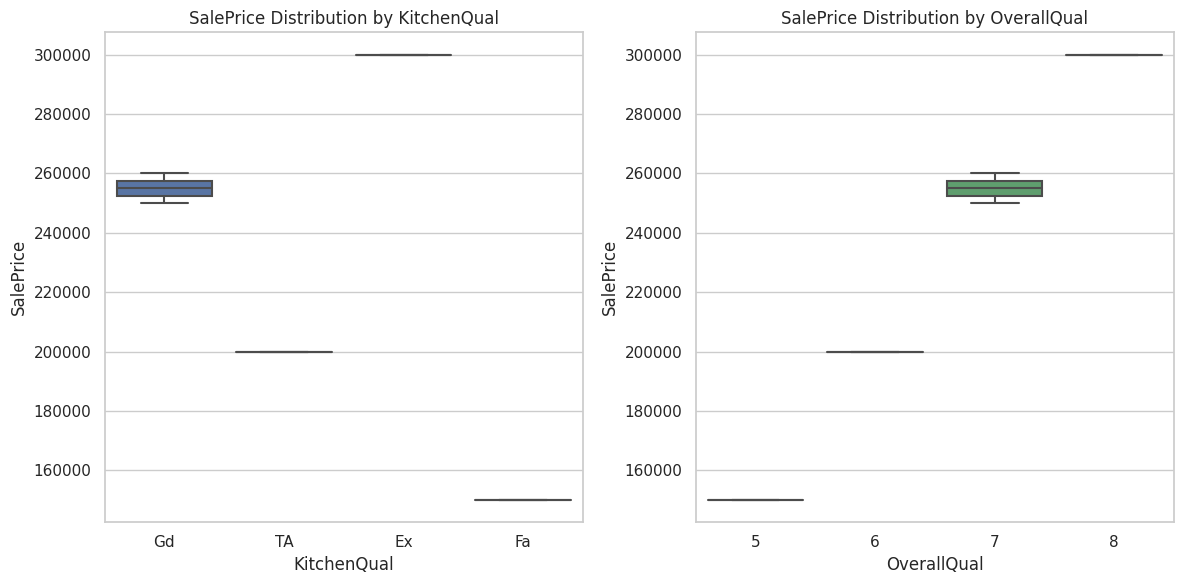

In [31]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='KitchenQual', y='SalePrice', data=df)
plt.xlabel('KitchenQual')
plt.ylabel('SalePrice')
plt.title('SalePrice Distribution by KitchenQual')

plt.subplot(1, 2, 2)
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('SalePrice Distribution by OverallQual')

plt.tight_layout()
plt.show()

In [32]:
correlation_matrix = df[['KitchenQual_Encoded', 'OverallQual']].corr()
print("Correlation between KitchenQual and OverallQual:")
print(correlation_matrix)

Correlation between KitchenQual and OverallQual:
                     KitchenQual_Encoded  OverallQual
KitchenQual_Encoded                  1.0          1.0
OverallQual                          1.0          1.0


---

NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

### Summary
* The following variables are the most relevant, they all have a value or 0.6 for either Spearman or Pearson correlation.
    * OverallQual   
    * GrLivArea  
    * GarageArea   
    * TotalBsmtSF  
    * YearBuilt  
    * 1stFlrSF     

From this investigation we can that the following factors are most relevant: Quality, Space(Area), Age(YearBuilt), according to our Business requirement * 1. - "The client is interested in discovering how the house attributes correlate with the sale price". We can now know that these factors and the associated variables has the strongest correlation with the sale price. 

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
